# Fourier Transformation

Whats done here

In [1]:
import numpy as num
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
file = 'data/NY_climate_2010.csv'
file = 'data/hourly_data_xxxx.txt' # https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/hourly/air_temperature/historical/

df = pd.read_csv(file, sep=';')

In [3]:
print(df.head(10))

   STATIONS_ID  MESS_DATUM  QN_9  TT_TU  RF_TU  eor
0            3  1950040101     5    5.7   83.0  eor
1            3  1950040102     5    5.6   83.0  eor
2            3  1950040103     5    5.5   83.0  eor
3            3  1950040104     5    5.5   83.0  eor
4            3  1950040105     5    5.8   85.0  eor
5            3  1950040106     5    5.9   84.0  eor
6            3  1950040107     5    6.0   81.0  eor
7            3  1950040108     5    6.4   79.0  eor
8            3  1950040109     5    7.1   80.0  eor
9            3  1950040110     5    7.7   81.0  eor


In [4]:
print(df.columns)

Index(['STATIONS_ID', 'MESS_DATUM', 'QN_9', 'TT_TU', 'RF_TU', 'eor'], dtype='object')


In [ ]:
df['year'] = 2010
df['month'] = df['DATE'].str.slice(0, 2)
df['day'] = df['DATE'].str.slice(3, 5)
#print(df[['day', 'month']])

df['minute'] = df['DATE'].str.slice(6, 8).astype(float) * 60
print(df['minute'])

df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'minute']])
print(df['datetime'])

In [9]:
df['year'] = df['MESS_DATUM'].astype(str).str.slice(0, 4)
df['month'] = df['MESS_DATUM'].astype(str).str.slice(4, 6)
df['day'] = df['MESS_DATUM'].astype(str).str.slice(6, 8)
df['minute'] = df['MESS_DATUM'].astype(str).str.slice(8,10).astype(float) * 60

df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'minute']])

df['seconds'] = (df[timecol] - df[timecol][0]).dt.total_seconds() 
print(df[['datetime', 'seconds']])

0        1950-04-01 01:00:00
1        1950-04-01 02:00:00
2        1950-04-01 03:00:00
3        1950-04-01 04:00:00
4        1950-04-01 05:00:00
                 ...        
534714   2011-03-31 19:00:00
534715   2011-03-31 20:00:00
534716   2011-03-31 21:00:00
534717   2011-03-31 22:00:00
534718   2011-03-31 23:00:00
Name: datetime, Length: 534719, dtype: datetime64[ns]
                  datetime       seconds
0      1950-04-01 01:00:00  0.000000e+00
1      1950-04-01 02:00:00  3.600000e+03
2      1950-04-01 03:00:00  7.200000e+03
3      1950-04-01 04:00:00  1.080000e+04
4      1950-04-01 05:00:00  1.440000e+04
...                    ...           ...
534714 2011-03-31 19:00:00  1.924970e+09
534715 2011-03-31 20:00:00  1.924974e+09
534716 2011-03-31 21:00:00  1.924978e+09
534717 2011-03-31 22:00:00  1.924981e+09
534718 2011-03-31 23:00:00  1.924985e+09

[534719 rows x 2 columns]


In [25]:
tempcol = 'TT_TU'
# tempcol = 'HLY-TEMP-NORMAL'

timecol = 'seconds'
#timecol = 'datetime'

xdata = df[timecol]
ydata = df[tempcol]

# dt = (60*60) # in secs?
dt = 1 / (24*365) # in years?

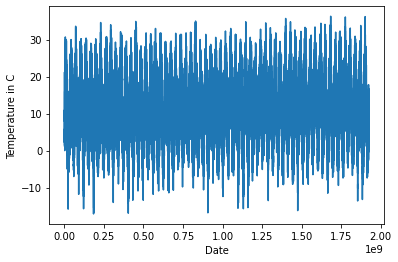

In [26]:
plt.figure()
plt.plot(xdata, ydata)
plt.xlabel('Date')
plt.ylabel('Temperature in C')
plt.show()

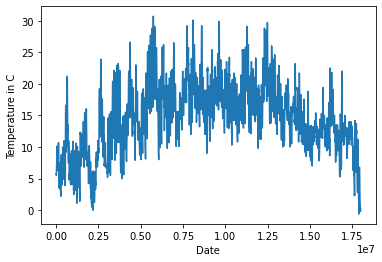

In [28]:
plt.figure()
cnt = 5000
plt.plot(xdata[:cnt], ydata[:cnt])
plt.xlabel('Date')
plt.ylabel('Temperature in C')
plt.show()

## FFT
Fast
Discrete etc.

In [ ]:

sp = num.fft.rfft(df[tempcol])
freq = num.fft.rfftfreq(len(df[timecol]), d=dt)

plt.figure()
plt.loglog(freq, abs(sp))

plt.show()

Show examples for white noise, single frequencies etc

0 [6.07204498e+02 1.82559184e+01 9.86236498e+00 ... 2.15677271e-02
 5.48274565e-02 9.31768212e-02]


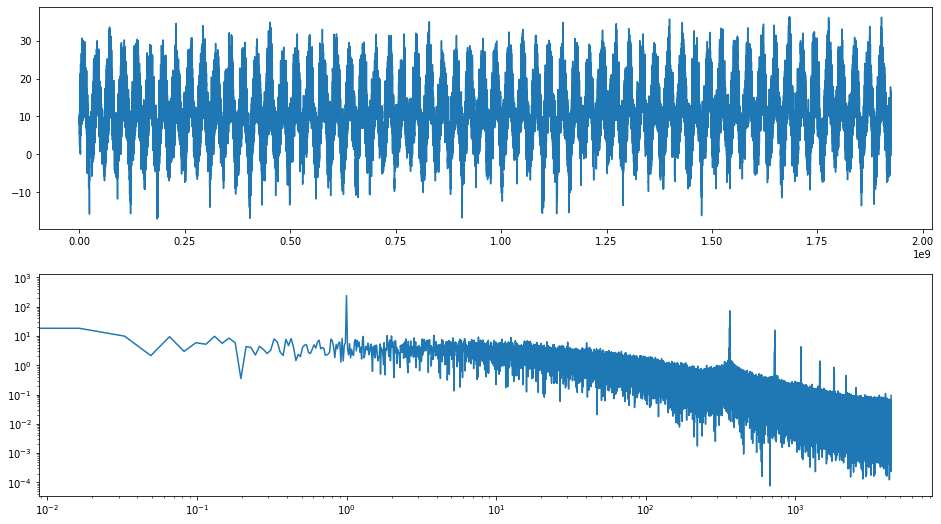

In [43]:
amps = abs(num.fft.rfft(ydata)) * dt
freqs = num.fft.rfftfreq(len(xdata), d=dt)

plt.figure(figsize=(16, 9))
ax = plt.subplot(2, 1, 1)
ax.plot(xdata, ydata)
ax = plt.subplot(2, 1, 2)
#ax.plot(freqs, amps)
ax.loglog(freqs, amps)

plt.show()